# Curso de Machine Learning Aplicado con Python

![Machine-Learning](assets/Machine-Learning.jpg)

Podemos encontrar mas datasets en https://www.kaggle.com/datasets

Las librerías con las que vamos a trabajar y que tenemos que cargar son:

1. Numpy
2. Pandas
3. Matplotlib.pyplot
4. Seaborn


In [1]:
# importamos las librerias
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
print("""
Version Numpy:     \t{} 
Version Pandas:    \t{} 
Version Matplotlib:\t{}
Version seaborn:   \t{}""".format(np.__version__,pd.__version__,matplotlib.__version__,sb.__version__))



Version Numpy:     	1.13.1 
Version Pandas:    	0.20.3 
Version Matplotlib:	2.0.2
Version seaborn:   	0.8.0


In [2]:
# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
%matplotlib inline

## Carguemos  en un pandas dataframe nuestra base de datos

`pd.read_csv` es el metodo que nos permite importar los datos desde un CSV y cargarlo en un **DataFrame**, que es la estructura de base de Pandas

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv', encoding='utf-8')

In [4]:
type(movies) # Esto es de tipo dataframe

pandas.core.frame.DataFrame

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### La columna en la que nos deberiamos enfocar es gross que es ingreso bruto, pero ya que no tenemos esa columna trabajaremos con revenue

In [6]:
#Que dimensiones tiene nuestro dataset
movies.shape

(4803, 20)

## Varios de los comandos utiles para pandas podemos encontrarlos [aquí](https://github.com/WillArevalo/Big-Data-and-Data-Science/blob/master/pandas-cheat-sheet.pdf)

In [7]:
#Nombres de las columnas
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
#Accedemos al index de las filas 
movies.index

RangeIndex(start=0, stop=4803, step=1)

In [9]:
#Accediendo a una columna 
columna1 = movies['title']
columna1.head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [10]:
#Accediendo a una fila
linea1 = movies.loc[10,:]
linea1

budget                                                          270000000
genres                  [{"id": 12, "name": "Adventure"}, {"id": 14, "...
homepage                                          http://www.superman.com
id                                                                   1452
keywords                [{"id": 83, "name": "saving the world"}, {"id"...
original_language                                                      en
original_title                                           Superman Returns
overview                Superman returns to discover his 5-year absenc...
popularity                                                        57.9256
production_companies    [{"name": "DC Comics", "id": 429}, {"name": "L...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2006-06-28
revenue                                                         391081192
runtime                               

## Inspección de los tipos de datos

### Datos importantes:

* La **inspección de los datos** se da para tener conocimiento de la salud de los datos que tenemos, saber si vienen limpios o no, y también porque se quiere tener un entendimiento cuantitativo de ellos. Parte de esto es mirar gráficos estadísticos y entender diferentes propiedades numéricas de las columnas.
* A diferencia de **Numpy, Pandas** no solo permite cargar datos numéricos, sino también datos de texto.
* El método info nos va a mostrar la cantidad completa de columnas con la cantidad de elementos no nulos que hay en esas columnas, y por último muestra el tipo de cada columna.



In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [12]:
#Columnas numericas y columnas de texto
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [13]:
#Miramos si es una columna de numeros de punto flotante o no
movies.dtypes == float

budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity               True
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average             True
vote_count              False
dtype: bool

In [14]:
# Si la columna es float o entera
(movies.dtypes == float) | (movies.dtypes == int)

budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity               True
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average             True
vote_count              False
dtype: bool

In [15]:
# Comprobar si es una columna de texto o no
movies.dtypes == object

budget                  False
genres                   True
homepage                 True
id                      False
keywords                 True
original_language        True
original_title           True
overview                 True
popularity              False
production_companies     True
production_countries     True
release_date             True
revenue                 False
runtime                 False
spoken_languages         True
status                   True
tagline                  True
title                    True
vote_average            False
vote_count              False
dtype: bool

In [16]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num

budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity               True
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average             True
vote_count              False
dtype: bool

In [17]:
num.index

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [18]:
for el in num:
    print(el)

False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False


In [20]:
num_cols = [c for c in num.index if num[c]]
num_cols

['popularity', 'runtime', 'vote_average']

In [23]:
movies.dtypes == int

budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average            False
vote_count              False
dtype: bool

In [33]:
cols_num = movies[['id','revenue','budget','popularity', 'runtime', 'vote_average','vote_count']]
cols_num.columns

Index(['id', 'revenue', 'budget', 'popularity', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

In [35]:
#Solo las que son texto
movies.dtypes == object
obj = (movies.dtypes == object)
cols_obj = [c for c in obj.index if obj[c]]
cols_obj

['genres',
 'homepage',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'production_companies',
 'production_countries',
 'release_date',
 'spoken_languages',
 'status',
 'tagline',
 'title']

## Inspección cuantitativa y de salud de los datos

In [39]:
movies_num = cols_num
movies_num.head()

,id,revenue,budget,popularity,runtime,vote_average,vote_count
0,19995,2787965087,237000000,150.437577,162.0,7.2,11800
1,285,961000000,300000000,139.082615,169.0,6.9,4500
2,206647,880674609,245000000,107.376788,148.0,6.3,4466
3,49026,1084939099,250000000,112.312950,165.0,7.6,9106
4,49529,284139100,260000000,43.926995,132.0,6.1,2124


In [41]:
# Estadistica de las columnas númericas
movies_num.describe()

# Count = cuantos valores ahi
# mean = promedio
# std = desviacion estandar
# min = minimo
# 25%, 50%, 75% = cuartiles
# max = maximo


,id,revenue,budget,popularity,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4.803000e+03,4803.000000,4801.000000,4803.000000,4803.000000
mean,57165.484281,8.226064e+07,2.904504e+07,21.492301,106.875859,6.092172,690.217989
std,88694.614033,1.628571e+08,4.072239e+07,31.816650,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9014.500000,0.000000e+00,7.900000e+05,4.668070,94.000000,5.600000,54.000000
50%,14629.000000,1.917000e+07,1.500000e+07,12.921594,103.000000,6.200000,235.000000
75%,58610.500000,9.291719e+07,4.000000e+07,28.313505,118.000000,6.800000,737.000000
max,459488.000000,2.787965e+09,3.800000e+08,875.581305,338.000000,10.000000,13752.000000


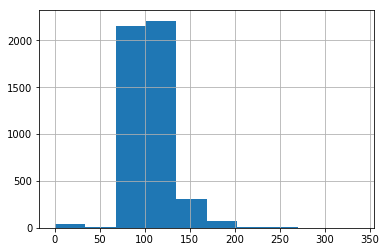

In [43]:
# Ver la informacion en plots
movies_num['runtime'].hist()

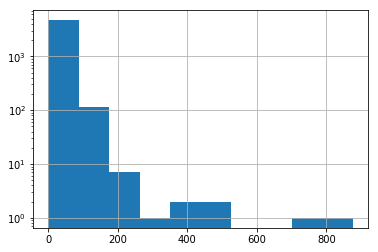

In [53]:
movies_num['popularity'].hist(log='true')